In [19]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from xgboost import plot_importance

In [25]:
file = open('albedo_df_updated/xgboost/xgboost_model_01.sav', 'rb')
model = pickle.load(file)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

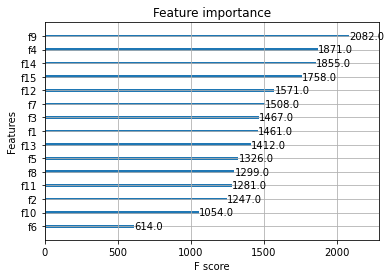

In [26]:
plot_importance(model)

In [21]:
X

,LWN,ST2,ME,SWD,RF,SF,SHF,LHF,SP,CD,CM,TT,QQ,UU,VV,AL2
388717,-35.034515,-0.615247,3.022029,249.188965,-1.965567,-3.798409,0.198664,-0.562795,843.915710,-1.123934,-0.355227,-0.072787,4.357193,0.230284,0.614159,0.555864
838467,-61.819885,-0.022640,3.563520,265.113647,-7.870503,-23.025851,40.803074,-0.184379,913.297546,-6.485837,-2.375416,3.776023,4.554878,-3.316634,-0.537203,0.548720
929434,-52.584167,-0.487556,2.819810,300.973145,-14.038257,-18.080555,5.007213,-6.688533,926.073425,-8.440422,-1.977735,0.679376,3.505169,-0.873767,0.531149,0.555284
230709,-59.719086,0.000000,4.229055,257.311676,-8.977564,-23.025851,107.520241,5.367142,901.769592,-7.041286,-23.025851,8.620724,4.774128,-2.275678,-3.305692,0.540162
1208102,-65.493195,-0.368135,3.434539,283.835541,-16.075648,-23.025851,38.617329,-7.799091,861.724548,-9.169518,-8.987197,4.871990,4.087193,2.115737,-1.585714,0.551153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383438,-51.787659,-0.026559,3.488525,289.934998,-11.224738,-23.025851,42.318047,-17.690645,868.615234,-23.025851,-6.302950,4.717889,3.999253,1.247766,2.535745,0.550710
1229416,-75.775696,-0.842374,2.882285,229.276230,-8.481408,-15.645800,91.975159,-43.702240,921.668274,-7.516113,-23.025851,1.573868,3.469960,-6.578327,1.253194,0.556242
220365,-68.494308,-0.265131,3.176590,279.257782,-9.492211,-23.025851,51.408817,-3.412685,921.680481,-5.797442,-6.014692,2.322747,3.984695,-3.599452,-0.124481,0.552739
79940,-66.234497,-4.806753,-23.025851,166.387985,-16.349473,-8.724020,43.823009,-30.591227,884.539490,-6.961077,-7.255118,-2.905254,2.483598,4.234320,6.067303,0.682560


In [27]:
import datetime
import numpy as np
from matplotlib import pyplot as plt, dates
import seaborn as sns 
import pandas as pd
import pickle
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import RandomizedSearchCV


data = pd.read_csv('albedo_df_updated.csv')
#data = data.drop('AL2', axis=1)

data = data.sample(frac = 0.1, random_state=42) # for testing


y = np.array(data['albedo']) 
X = data.drop(['albedo'], axis = 1)  
X_list = list(X.columns)
#X = np.array(X)


# log transformation
X.loc[X.ME<1e-10,'ME'] = 1e-10
X.loc[X.RF<1e-10,'RF'] = 1e-10
X.loc[X.SF<1e-10,'SF'] = 1e-10
X.loc[X.CD<1e-10,'CD'] = 1e-10
X.loc[X.CM<1e-10,'CM'] = 1e-10
X.ME = np.log(X.ME)
X.RF = np.log(X.RF)
X.SF = np.log(X.SF)
X.CD = np.log(X.CD)
X.CM = np.log(X.CM)

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size = 0.2, random_state = 42)
y_train_ori,y_test_ori  = y_train, y_test

In [28]:
# scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
#X_train = np.hstack([np.ones((X_train.shape[0], 1)), X_train])
#X_test = np.hstack([np.ones((X_test.shape[0], 1)), X_test])

minmax = MinMaxScaler()
y_train = pd.Series(minmax.fit_transform(pd.DataFrame(y_train)).reshape(1,-1)[0])
y_test = pd.Series(minmax.transform(pd.DataFrame(y_test)).reshape(1,-1)[0])


In [29]:
y_train_pred = model.predict(X_train)
r2_train = r2_score(y_train, y_train_pred)
print(r2_train)

-0.4401369688138592


In [30]:
y_test_pred = model.predict(X_test)
r2_test = r2_score(y_test, y_test_pred)
print(r2_test)

-0.4393668638353023


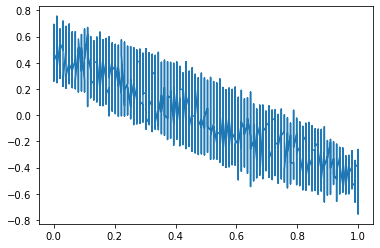

In [31]:
Res = pd.DataFrame(columns = ['Residual','y_true'])
Res['Residual'] = y_train_pred-y_train
Res['y_true']  = y_train
Res_sorted = Res.sort_values(by='y_true')
y = Res_sorted['y_true']
residual = Res_sorted['Residual']
plt.plot(y,residual)

Text(0.5, 1.0, 'Residual Related to Albedo (Scaled)')

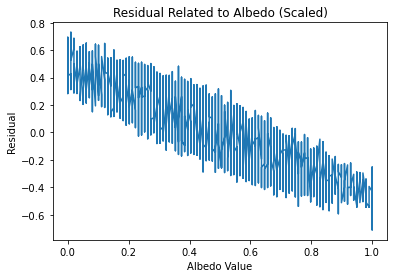

In [36]:
Res = pd.DataFrame(columns = ['Residual','y_true'])
Res['Residual'] = y_test_pred-y_test
Res['y_true']  = y_test
Res_sorted = Res.sort_values(by='y_true')
y = Res_sorted['y_true']
residual = Res_sorted['Residual']
plt.plot(y,residual);
plt.ylabel('Residual');
plt.xlabel('Albedo Value');
plt.title('Residual Related to Albedo (Scaled)')

In [181]:
Zt_1 = np.random.normal(loc=0,scale=4,size=100000)
Zt = np.random.normal(loc=0,scale=4,size=100000)
Ztp1 = np.random.normal(loc=0,scale=4,size=100000)
(Zt*Zt*Zt_1).mean()

0.02576314157716823

15.969737214110868

In [126]:
x= np.array([1,2])
y = np.array([3,4])
x*y

array([3, 8])

In [119]:
np.multiply(Zt**2,Zt_1, Ztp1).mean()

-0.0386105051335619